In [1]:
from google.colab import drive
import sys
drive.mount('/content/drive',force_remount=True)
sys.path.insert(0,'/content/drive/MyDrive/EPF notebooks/deep_learning_project')

Mounted at /content/drive


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets, models, transforms

import numpy as np
import matplotlib.pyplot as plt

from package import batch_gd, report,train_dataset, test_dataset, \
    transforms, train_loader, test_loader

# **Transfer learning**
### **Comparing our CNN with a pretrained EfficientNet**
In this notebook we'll compare our previous model with a pretrained EfficientNet, the details of why we chose an EfficientNet are provided in the "cv_pretrained_models" notebook. 


Reference: https://debuggercafe.com/transfer-learning-using-efficientnet-pytorch/

In [3]:
def build_model(pretrained=True, fine_tune=True, num_classes=43):
  """
  pretrained: boolean value indicating whether we want to load the ImageNet weights or not
  fine_tune: boolean value. When it is True, all the intermediate layers will also be trained
  """
  if pretrained:
      print('Loading pre-trained weights')
      model = models.efficientnet_v2_s(weights=models.EfficientNet_V2_S_Weights.DEFAULT)
  else:
      print('Not loading pre-trained weights')
      model = models.efficientnet_v2_s()
  if fine_tune:
      print('Fine-tuning all layers')
      for params in model.parameters():
          params.requires_grad = True
  elif not fine_tune:
      print('Freezing hidden layers')
      for params in model.parameters():
          params.requires_grad = False
  # Change the final classification head
  model.classifier[1] = nn.Linear(in_features=1280, out_features=num_classes)
  return model

In [4]:
model = build_model(pretrained=True, fine_tune=True)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

Loading pre-trained weights
Fine-tuning all layers


In [5]:
#model # uncomment to see the full architecture

We are only interested in the last layer (the classifier). Indeed we'll replace it with a new layer to act as a new classifier. Here 1280 input features will be needed.

```Python 
(classifier): Sequential(
    (0): Dropout(p=0.2, inplace=True)
    (1): Linear(in_features=1280, out_features=1000, bias=True)
```

In [6]:
train_losses, test_losses = batch_gd(model, criterion, optimizer, train_loader, test_loader, 10)

  0%|          | 0/209 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

Epoch 1 / 10: Train Loss : 0.2649, Test Loss : 0.1926, duration: 0:02:23.348932


  0%|          | 0/209 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

Epoch 2 / 10: Train Loss : 0.0266, Test Loss : 0.1217, duration: 0:02:20.005995


  0%|          | 0/209 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

Epoch 3 / 10: Train Loss : 0.0163, Test Loss : 0.0732, duration: 0:02:20.172978


  0%|          | 0/209 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

Epoch 4 / 10: Train Loss : 0.0093, Test Loss : 0.1091, duration: 0:02:19.927899


  0%|          | 0/209 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

Epoch 5 / 10: Train Loss : 0.0306, Test Loss : 0.0712, duration: 0:02:20.221743


  0%|          | 0/209 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

Epoch 6 / 10: Train Loss : 0.0222, Test Loss : 0.0459, duration: 0:02:20.253903


  0%|          | 0/209 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

Epoch 7 / 10: Train Loss : 0.0108, Test Loss : 0.0543, duration: 0:02:19.919712


  0%|          | 0/209 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

Epoch 8 / 10: Train Loss : 0.0121, Test Loss : 0.0659, duration: 0:02:20.241422


  0%|          | 0/209 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

Epoch 9 / 10: Train Loss : 0.0057, Test Loss : 0.0847, duration: 0:02:19.719741


  0%|          | 0/209 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

Epoch 10 / 10: Train Loss : 0.0182, Test Loss : 0.0831, duration: 0:02:19.938592


RuntimeError: ignored

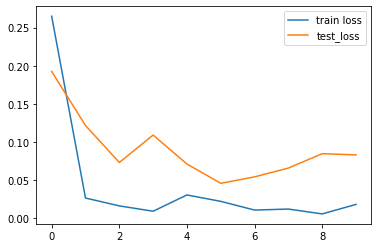

In [8]:
X_test, p_test, y_test = report(model,test_loader, train_losses, test_losses)

# **Conclusion**
We see that the model is slighlty *_overfitting_*, in a last notebook, we'll try to implement early stopping to stop the training at the best moment.